In [1]:
import pandas as pd
from functools import reduce
import numpy as np
import gc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_feather("../data/finaldata/fact_data.feather")

In [3]:
tmp_data = data._get_numeric_data()
tmp_data = tmp_data.fillna(0)
tmp_data.head()

,product_volume,number_of_blood_product_units_processed,number_of_donation_units_processed,number_of_duplicated_donation_units,number_of_skipped_donation_barcodes,number_of_donation_alarms,number_of_alerts,number_of_duplicated_exception_units,number_of_reprocessed_units,number_of_inconclusive_sealed_units,number_of_unrecognized_barcodes,number_of_skipped_exception_barcodes,number_of_temp_out_of_range_exceptions,number_of_exception_alarms,procedure_duration_minutes,idle_time_duration_minutes,load_duration_minutes,unload_duration_minutes,load_idle_time_duration_minutes,run_duration_minutes,barcode_scan_duration_minutes,number_of_procedures,number_of_dummy_bags,number_of_barcode_scans,number_of_skipped_run_barcodes,start_basin_temperature,end_basin_temperature,max_basin_temperature,min_basin_temperature,run_number
0,94,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0
1,64,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0
2,9,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0
3,180,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0
4,68,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0


## K Means with number of alerts and product volume

In [4]:
tmp_data['product_volume'].describe()

count    2.192149e+07
mean     9.476367e+01
std      1.114456e+02
min      0.000000e+00
25%      1.300000e+01
50%      4.600000e+01
75%      2.010000e+02
max      8.162000e+03
Name: product_volume, dtype: float64

In [5]:
simpleDataProdVolume = tmp_data.filter(['number_of_alerts', 'product_volume'])

In [6]:
train_data_prod_volume, test_data_prod_volume = train_test_split(simpleDataProdVolume, test_size=0.5)

In [7]:
kmeans_prod_volume = KMeans(n_clusters=4, random_state=0).fit(train_data_prod_volume)
labels_prod_volume = kmeans_prod_volume.labels_

In [8]:
kmeans_prod_volume.fit(np.array(train_data_prod_volume['product_volume'].values).reshape(-1, 1).astype('int'))
y_kmeans_prod_volume = kmeans_prod_volume.predict(np.array(train_data_prod_volume['product_volume'].values).reshape(-1, 1).astype('int'))


[[  19.37626124]
 [ 258.71848188]
 [4433.06088993]
 [  71.12218024]]


Text(0.5, 1.0, 'number_of_alerts versus product_volume')

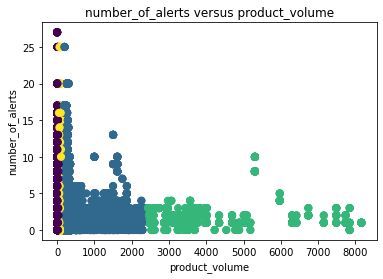

In [9]:
centers_prod_volume = kmeans_prod_volume.cluster_centers_
print(centers_prod_volume)
#plt.scatter(centers_prod_volume, centers_prod_volume, c='black', s=200, alpha=0.5)
plt.scatter(train_data_prod_volume['product_volume'], train_data_prod_volume['number_of_alerts'], c=y_kmeans_prod_volume, s=50, cmap='viridis')
plt.xlabel('product_volume')
plt.ylabel('number_of_alerts')
plt.title('number_of_alerts versus product_volume')


## K Means with number of alerts and min temperature

In [10]:
tmp_data['min_basin_temperature'].describe()

count    2.192149e+07
mean     2.036730e+01
std      2.168995e+00
min      0.000000e+00
25%      2.013100e+01
50%      2.071200e+01
75%      2.102500e+01
max      5.500000e+01
Name: min_basin_temperature, dtype: float64

In [12]:
simpleDataMinTemp = tmp_data.filter(['number_of_alerts', 'min_basin_temperature'])

In [13]:
train_data_min_temp, test_data_min_temp = train_test_split(simpleDataMinTemp, test_size=0.5)

In [14]:
kmeans_min_temp = KMeans(n_clusters=4, random_state=0).fit(train_data_min_temp)
labels_min_temp = kmeans_min_temp.labels_

In [15]:
kmeans_min_temp.fit(train_data_min_temp['min_basin_temperature'].values.reshape(-1, 1).astype('float'))
y_kmeans_min_temp = kmeans_min_temp.predict(train_data_min_temp['min_basin_temperature'].values.reshape(-1, 1).astype('float'))


[[2.11035156e+01]
 [6.22474015e-04]
 [1.94933456e+01]
 [2.03885660e+01]]


Text(0.5, 1.0, 'number_of_alerts versus min_basin_temperature')

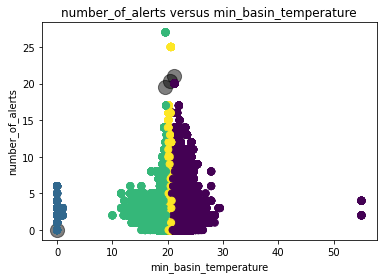

In [16]:
centers_min_temp = kmeans_min_temp.cluster_centers_
print(centers_min_temp)
plt.scatter(centers_min_temp, centers_min_temp, c='black', s=200, alpha=0.5)
plt.scatter(train_data_min_temp['min_basin_temperature'], train_data_min_temp['number_of_alerts'], c=y_kmeans_min_temp, s=50, cmap='viridis')
plt.xlabel('min_basin_temperature')
plt.ylabel('number_of_alerts')
plt.title('number_of_alerts versus min_basin_temperature')


## K Means with number of alerts and max temperature

In [17]:
tmp_data['max_basin_temperature'].describe()

count    2.192149e+07
mean     2.257268e+01
std      2.317299e+00
min      0.000000e+00
25%      2.258400e+01
50%      2.276400e+01
75%      2.295400e+01
max      5.500000e+01
Name: max_basin_temperature, dtype: float64

In [19]:
simpleDataMaxTemp = tmp_data.filter(['number_of_alerts', 'max_basin_temperature'])

In [20]:
train_data_max_temp, test_data_max_temp = train_test_split(simpleDataMaxTemp, test_size=0.5)

In [21]:
kmeans_max_temp = KMeans(n_clusters=5, random_state=0).fit(train_data_max_temp)
labels_max_temp = kmeans_max_temp.labels_

In [22]:
kmeans_max_temp.fit(train_data_max_temp['max_basin_temperature'].values.reshape(-1, 1).astype('float'))
y_kmeans_max_temp = kmeans_max_temp.predict(train_data_max_temp['max_basin_temperature'].values.reshape(-1, 1).astype('float'))

[[2.30765301e+01]
 [7.62326544e-04]
 [2.26208194e+01]
 [2.08717894e+01]
 [2.42164308e+01]]


Text(0.5, 1.0, 'number_of_alerts versus max_basin_temperature')

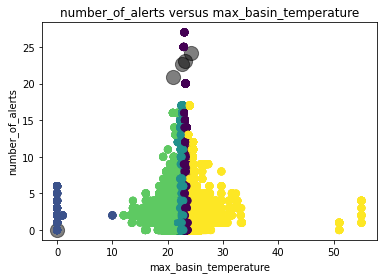

In [23]:
centers_max_temp = kmeans_max_temp.cluster_centers_
print(centers_max_temp)
plt.scatter(centers_max_temp, centers_max_temp, c='black', s=200, alpha=0.5)
plt.scatter(train_data_max_temp['max_basin_temperature'], train_data_max_temp['number_of_alerts'], c=y_kmeans_max_temp, s=50, cmap='viridis')
plt.xlabel('max_basin_temperature')
plt.ylabel('number_of_alerts')
plt.title('number_of_alerts versus max_basin_temperature')



## K Means with number of alerts and temp out of range exceptions

In [24]:
tmp_data['number_of_temp_out_of_range_exceptions'].describe()

count    2.192149e+07
mean     5.664715e-03
std      7.505082e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: number_of_temp_out_of_range_exceptions, dtype: float64

In [25]:
simpleDataBadTemp = tmp_data.filter(['number_of_alerts', 'number_of_temp_out_of_range_exceptions'])

In [26]:
train_data_bad_temp, test_data_bad_temp = train_test_split(simpleDataBadTemp, test_size=0.5)

In [27]:
kmeans_bad_temp = KMeans(n_clusters=2, random_state=0).fit(train_data_bad_temp)
labels_bad_temp = kmeans_bad_temp.labels_

In [28]:
kmeans_bad_temp.fit(np.array(train_data_bad_temp['number_of_temp_out_of_range_exceptions'].values).reshape(-1, 1).astype('float'))
y_kmeans_bad_temp = kmeans_bad_temp.predict(np.array(train_data_bad_temp['number_of_temp_out_of_range_exceptions'].values).reshape(-1, 1).astype('float'))


[[1.]
 [0.]]


Text(0.5, 1.0, 'number_of_alerts versus number_of_temp_out_of_range_exceptions')

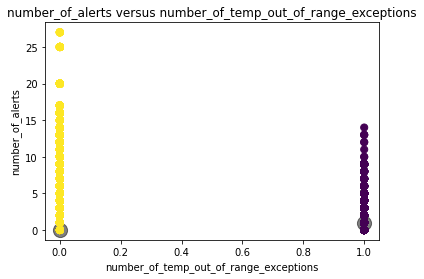

In [29]:
centers_bad_temp = kmeans_bad_temp.cluster_centers_
print(centers_bad_temp)
plt.scatter(centers_bad_temp, centers_bad_temp, c='black', s=200, alpha=0.5)
plt.scatter(train_data_bad_temp['number_of_temp_out_of_range_exceptions'], train_data_bad_temp['number_of_alerts'], c=y_kmeans_bad_temp, s=50, cmap='viridis')

plt.xlabel('number_of_temp_out_of_range_exceptions')
plt.ylabel('number_of_alerts')
plt.title('number_of_alerts versus number_of_temp_out_of_range_exceptions')



## K Means with number of alerts and run duration

In [30]:
tmp_data['run_duration_minutes'].describe()

count    2.192149e+07
mean     2.154039e+01
std      7.819052e+01
min      0.000000e+00
25%      1.888333e+01
50%      1.993333e+01
75%      2.066667e+01
max      1.018568e+04
Name: run_duration_minutes, dtype: float64

In [31]:
simpleDataRunDuration = tmp_data.filter(['number_of_alerts', 'run_duration_minutes'])

In [32]:
train_data_run_duration, test_data_run_duration = train_test_split(simpleDataRunDuration, test_size=0.5)

In [33]:
train_data_run_duration.head(10)

,number_of_alerts,run_duration_minutes
12069874,0,22.133333
443024,0,16.850000
14286865,0,16.116667
11822780,0,16.549999
18558614,0,19.208317
14880955,0,21.766666
20510101,2,2.066667
17204655,0,23.600000
6637663,0,18.540867
142787,2,20.883333


In [34]:
kmeans_run_duration = KMeans(n_clusters=7, random_state=0).fit(train_data_run_duration)

In [35]:
labels_run_duration = kmeans_run_duration.labels_

In [36]:
kmeans_run_duration.fit(train_data_run_duration['run_duration_minutes'].values.reshape(-1, 1).astype('float'))
y_kmeans_run_duration = kmeans_run_duration.predict(train_data_run_duration['run_duration_minutes'].values.reshape(-1, 1).astype('float'))

[[  19.4662859 ]
 [3975.43967442]
 [1440.21254597]
 [2759.96279146]
 [6085.50390121]
 [9599.92218192]
 [ 633.00973432]]


Text(0.5, 1.0, 'number_of_alerts versus run_duration_minutes')

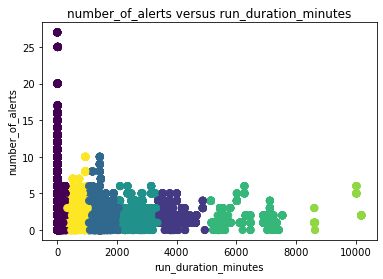

In [37]:
centers_run_duration = kmeans_run_duration.cluster_centers_
print(centers_run_duration)
plt.scatter(train_data_run_duration['run_duration_minutes'], train_data_run_duration['number_of_alerts'], c=y_kmeans_run_duration, s=50, cmap='viridis')


plt.xlabel('run_duration_minutes')
plt.ylabel('number_of_alerts')
plt.title('number_of_alerts versus run_duration_minutes')



## K Means with number of alerts and procedure duration minutes

In [52]:
tmp_data['procedure_duration_minutes'].describe()

count    2.192149e+07
mean     4.982359e+01
std      1.399619e+02
min      0.000000e+00
25%      2.595000e+01
50%      3.193333e+01
75%      4.758333e+01
max      5.478745e+04
Name: procedure_duration_minutes, dtype: float64

In [53]:
simpleDataProcedureDuration = tmp_data.filter(['number_of_alerts', 'procedure_duration_minutes'])

In [54]:
train_data_procedure_duration, test_data_procedure_duration = train_test_split(simpleDataProcedureDuration, test_size=0.5)

In [56]:
kmeans_procedure_duration = KMeans(n_clusters=3, random_state=0).fit(train_data_procedure_duration)

In [57]:
labels_procedure_duration = kmeans_procedure_duration.labels_

In [58]:
kmeans_procedure_duration.fit(test_data_procedure_duration['procedure_duration_minutes'].values.reshape(-1, 1).astype('float'))
y_kmeans_procedure_duration = kmeans_procedure_duration.predict(test_data_procedure_duration['procedure_duration_minutes'].values.reshape(-1, 1).astype('float'))


[[   47.57609704]
 [12070.02495231]
 [ 4046.61529728]]


Text(0.5, 1.0, 'number_of_alerts versus procedure_duration_minutes')

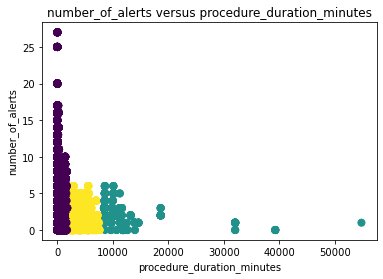

In [59]:
centers_procedure_duration = kmeans_procedure_duration.cluster_centers_
print(centers_procedure_duration)
plt.scatter(test_data_procedure_duration['procedure_duration_minutes'], test_data_procedure_duration['number_of_alerts'], c=y_kmeans_procedure_duration, s=50, cmap='viridis')

plt.xlabel('procedure_duration_minutes')
plt.ylabel('number_of_alerts')
plt.title('number_of_alerts versus procedure_duration_minutes')

